# Start here

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole.

In [1]:
import numpy as np

# import the package and the web API
import tidy3d as td
import tidy3d.web as web


[16:38:13] WARNING  This version of Tidy3D was pip installed from the         ]8;id=119067;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/__init__.py\__init__.py]8;;\:]8;id=393344;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/__init__.py#104\104]8;;\
                    'tidy3d-beta' repository on PyPI. Future releases will be                
                    uploaded to the 'tidy3d' repository. From now on, please                 
                    use 'pip install tidy3d' instead.                                        

           INFO     Using client version: 1.9.0rc2                            ]8;id=139908;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/__init__.py\__init__.py]8;;\:]8;id=21395;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/__init__.py#122\122]8;;\

In [2]:
# set up parameters of simulation (length scales are micrometers)
grid_cells_per_wvl = 30
pml = td.PML()
sim_size = (4, 4, 4)
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 10.0
run_time = 12.0 / fwidth

# create structure
dielectric = td.Medium.from_nk(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)), medium=dielectric
)

# create source
source = td.UniformCurrentSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth),
    polarization="Ey",
)

# create monitor
monitor = td.FieldMonitor(
    fields=["Ex", "Ey", "Hz"],
    center=(0, 0, 0),
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name="fields_on_plane",
)

# Initialize simulation
sim = td.Simulation(
    size=sim_size,
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=grid_cells_per_wvl),
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=run_time,
    boundary_spec=td.BoundarySpec.all_sides(boundary=td.PML()),
)


In [3]:
print(
    f"simulation grid is shaped {sim.grid.num_cells} for {int(np.prod(sim.grid.num_cells)/1e6)} million cells."
)


           INFO     Auto meshing using wavelength 1.0000 defined from        ]8;id=432546;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=859639;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/components/grid/grid_spec.py#510\510]8;;\
                    sources.                                                                 

simulation grid is shaped [192, 192, 192] for 7 million cells.


In [4]:
# run the simulation, download the data.
data = web.run(sim, task_name="quickstart", path="data/data.hdf5")


           INFO     Using Tidy3D credentials from stored file.                     ]8;id=714937;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/auth.py\auth.py]8;;\:]8;id=156233;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/auth.py#77\77]8;;\

[16:38:14] INFO     Authentication successful.                                     ]8;id=564831;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/auth.py\auth.py]8;;\:]8;id=302798;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/auth.py#37\37]8;;\

           INFO     Created task 'quickstart' with task_id                      ]8;id=532534;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=974904;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#120\120]8;;\
                    'aa27389f-b403-4cfe-a604-a6bc638f3f57'.                                  

Output()

[16:38:15] INFO     Maximum FlexUnit cost: 0.028                                ]8;id=388847;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=212481;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#253\253]8;;\

           INFO     status = queued                                             ]8;id=630892;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=773173;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#262\262]8;;\

Output()

[16:38:19] INFO     status = preprocess                                         ]8;id=748501;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=608266;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#274\274]8;;\

[16:38:22] INFO     starting up solver                                          ]8;id=633285;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=847879;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#278\278]8;;\

[16:38:33] INFO     running solver                                              ]8;id=965095;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=266537;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#284\284]8;;\

Output()

[16:39:10] INFO     early shutoff detected, exiting.                            ]8;id=303317;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=629169;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#295\295]8;;\

           INFO     status = postprocess                                        ]8;id=674925;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=765983;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#301\301]8;;\

Output()

[16:39:13] INFO     status = success                                            ]8;id=413468;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=62078;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#307\307]8;;\

           INFO     Billed FlexUnit cost: 0.000                                 ]8;id=634949;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=328508;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#311\311]8;;\

           INFO     downloading file "output/monitor_data.hdf5" to              ]8;id=100887;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=874683;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#593\593]8;;\
                    "data/data.hdf5"                                                         

Output()

[16:39:14] INFO     loading SimulationData from data/data.hdf5                  ]8;id=437636;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=878560;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#415\415]8;;\

In [5]:
# see the log
print(data.log)


Simulation domain Nx, Ny, Nz: [192, 192, 192]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 7.3014e+06.
Using subpixel averaging: True
Number of time steps: 1.2659e+04
Automatic shutoff factor: 1.00e-05
Time step (s): 3.1624e-17


Compute source modes time (s):     0.0161
Compute monitor modes time (s):    0.0023
Rest of setup time (s):            2.2359

Running solver for 12659 time steps...
- Time step    506 / time 1.60e-14s (  4 % done), field decay: 1.00e+00
- Time step    839 / time 2.65e-14s (  6 % done), field decay: 1.00e+00
- Time step   1012 / time 3.20e-14s (  8 % done), field decay: 1.00e+00
- Time step   1519 / time 4.80e-14s ( 12 % done), field decay: 1.44e-01
- Time step   2025 / time 6.40e-14s ( 16 % done), field decay: 3.23e-02
- Time step   2531 / time 8.00e-14s ( 20 % done), field decay: 1.37e-02
- Time step   3038 / time 9.61e-14s ( 24 % done), field decay: 6.90e-03
- Time step   3544 / time 1.12e-13s ( 28 % done), field decay: 3.30e-03
- Time

           INFO     Auto meshing using wavelength 1.0000 defined from        ]8;id=354345;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=198973;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/components/grid/grid_spec.py#510\510]8;;\
                    sources.                                                                 

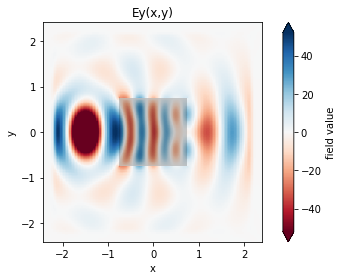

In [6]:
# plot the fields stored in the monitor
ax = data.plot_field("fields_on_plane", "Ey", z=0)
_ = ax.set_title("Ey(x,y)")
